In [1]:
import catalyst
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller

In [22]:

btc_daily = pd.read_csv("poloniex_daily_2017-01-01_2018-05-01.csv")
#Correlation Test for different lookback and holddays
from scipy.stats import pearsonr

days = [1,2,5,10,15,20,25,30,60,100]

import datetime
import pytz
btc_daily.Time = pd.to_datetime(btc_daily.Time)
timefilter = datetime.datetime(2018,1,1,0,0,0,0,pytz.utc)
btc_2018_daily = btc_daily[btc_daily.Time>timefilter]
print(btc_2018_daily.head())

for lookback in days:
    for holddays in days:
        return_lag = (btc_2018_daily.Price.shift(1) - btc_2018_daily.Price.shift(lookback))/btc_2018_daily.Price.shift(lookback)
        return_fut = (btc_2018_daily.Price.shift(-holddays) - btc_2018_daily.Price)/btc_daily.Price
        
        valid_days = (return_lag.isnull() == False) & (return_fut.isnull() ==False)
        return_lag = return_lag[valid_days]
        return_fut = return_fut[valid_days]
        #Resample to avoid overlapping days
        if lookback >= holddays:
            return_lag = return_lag.iloc[::lookback]
            return_fut = return_fut.iloc[::lookback]
        else:
            return_lag = return_lag.iloc[::holddays]
            return_fut = return_fut.iloc[::holddays]
        
        log_return_lag = np.log(return_lag + 1)
        log_return_fut = np.log(return_fut + 1)
        
        # Calculate correlation
        [corr, pvalue] = pearsonr(return_lag, return_fut)
        [log_corr, log_pvalue] = pearsonr(log_return_lag, log_return_fut)
        if pvalue <= 0.20:
            print("lookback:{}, holddays:{}, correlation:{}, p value:{}".format(lookback, holddays, corr, pvalue))
            
        if log_pvalue <= 0.20:
            print("Log return lookback:{}, holddays:{}, correlation:{}, p value:{}".format(lookback, holddays, log_corr, log_pvalue))






                   Time         Price        Volume
365 2018-01-01 23:59:00  13351.739406  7.883416e+07
366 2018-01-02 23:59:00  14738.000000  1.092241e+08
367 2018-01-03 23:59:00  15140.000000  1.060386e+08
368 2018-01-04 23:59:00  15167.628033  1.111903e+08
369 2018-01-05 23:59:00  16924.000000  1.271014e+08
lookback:2, holddays:15, correlation:-0.7296880106126121, p value:0.06268233386891575
Log return lookback:2, holddays:15, correlation:-0.7114243277004826, p value:0.07301911446711494
lookback:2, holddays:30, correlation:-0.9706594196646261, p value:0.15459558968742038
Log return lookback:2, holddays:30, correlation:-0.983229587554195, p value:0.11675508620738013
lookback:5, holddays:1, correlation:-0.4679455951598297, p value:0.024335936598014887
Log return lookback:5, holddays:1, correlation:-0.46901953489009923, p value:0.02396735533353857
lookback:5, holddays:2, correlation:-0.2944917376171949, p value:0.17255240933357005
Log return lookback:5, holddays:2, correlation:-0.29164

/Users/taoranli/anaconda3/envs/catalyst/lib/python3.6/site-packages/scipy/stats/stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


Log return lookback:15, holddays:20, correlation:-0.7011552061548234, p value:0.1870708380482555
lookback:25, holddays:2, correlation:-0.8030138671609943, p value:0.19698613283900573
lookback:30, holddays:15, correlation:-0.9881645015831131, p value:0.09804324345244501
Log return lookback:30, holddays:15, correlation:-0.9998289027570082, p value:0.011776678496412438
lookback:30, holddays:20, correlation:-0.9919381801764239, p value:0.08089168161769164
Log return lookback:30, holddays:20, correlation:-0.9999793822643719, p value:0.004088051424685447
Log return lookback:30, holddays:25, correlation:-0.9701388756367255, p value:0.15596777426386604
lookback:30, holddays:30, correlation:-0.9981365633230675, p value:0.038870479985504275
Log return lookback:30, holddays:30, correlation:-0.9955317743784146, p value:0.060203884125530856


/Users/taoranli/anaconda3/envs/catalyst/lib/python3.6/site-packages/scipy/stats/stats.py:2998: RuntimeWarning: Mean of empty slice.
  mx = x.mean()
/Users/taoranli/anaconda3/envs/catalyst/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/taoranli/anaconda3/envs/catalyst/lib/python3.6/site-packages/scipy/stats/stats.py:2999: RuntimeWarning: Mean of empty slice.
  my = y.mean()


In [29]:
btc_minute = pd.read_csv("poloniex_minute_2018-01-01_2018-05-01.csv")
minute = [5,10,15,20,50, 75, 100,200, 500,800, 1000,1200, 1440, 2000, 2880, 5000, 7200, 10000, 14400]

for lookback in minute:
    for holddays in minute:
        return_lag = (btc_minute.Price.shift(-1) - btc_minute.Price.shift(lookback))/btc_minute.Price.shift(lookback)
        return_fut = (btc_minute.Price.shift(-holddays) - btc_minute.Price)/btc_minute.Price
        valid_days = (return_lag.isnull() == False) & (return_fut.isnull() ==False)
        return_lag = return_lag[valid_days]
        return_fut = return_fut[valid_days]
        # Resample to avoid overlapping days
        if lookback >= holddays:
            return_lag = return_lag.iloc[::lookback]
            return_fut = return_fut.iloc[::lookback]
        else:
            return_lag = return_lag.iloc[::holddays]
            return_fut = return_fut.iloc[::holddays]
        
        # Calculate correlation
        [corr, pvalue] = pearsonr(return_lag, return_fut)
        if pvalue <= 0.05 and np.abs(corr) > 0.15:
            print("lookback:{}, holddays:{}, correlation:{}, p value:{}".format(lookback, holddays, corr, pvalue))
        

lookback:5, holddays:5, correlation:0.1790115422846322, p value:8.816800676438949e-249
lookback:5, holddays:10000, correlation:-0.5143213886799077, p value:0.03466603078901215
lookback:20, holddays:10000, correlation:-0.4942960181094679, p value:0.043707623966674825
lookback:50, holddays:10000, correlation:-0.5731873048343589, p value:0.016159416140775523
lookback:75, holddays:10000, correlation:-0.4876961010703305, p value:0.047046571501357846
lookback:100, holddays:5000, correlation:-0.3703497082641806, p value:0.03108032757533714
lookback:100, holddays:10000, correlation:-0.553734152642264, p value:0.021102480428511126
lookback:500, holddays:5, correlation:-0.15630804418378297, p value:0.003462457344511337
lookback:1440, holddays:200, correlation:0.21105340145448473, p value:0.020673013255858727
lookback:2000, holddays:5, correlation:-0.22167547162231777, p value:0.03906577766195011
lookback:2000, holddays:10, correlation:-0.21543731195116314, p value:0.04507008053251129
lookback:20

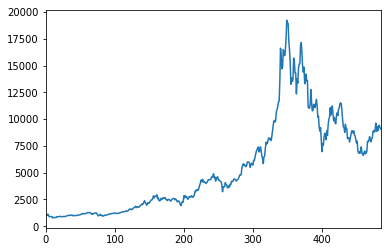

In [7]:
btc.Price.plot()

In [4]:
btc_values = btc.Price.values
result = adfuller(btc_values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))


ADF Statistic: -2.004747
p-value: 0.284496
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


In [15]:
import datetime
import pytz
btc.Time = pd.to_datetime()

In [28]:
timefilter = datetime.datetime(2018,2,1,0,0,0,0,pytz.utc)
btc.loc(btc.Time>timefilter)
btc.loc[btc.Time > timefilter,['Time','Price']]
btc_2018_values = btc.loc[btc.Time > timefilter,'Price']
result = adfuller(btc_2018_values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))


ADF Statistic: -1.785886
p-value: 0.387491
Critical Values:
	1%: -3.506
	5%: -2.895
	10%: -2.584


365    13351.739406
366    14738.000000
367    15140.000000
368    15167.628033
369    16924.000000
370    17145.392917
371    16174.433572
372    14900.000000
373    14388.062535
374    14854.000000
375    13291.675678
376    13812.527343
377    14204.999998
378    13560.000000
379    13580.000000
380    11102.697981
381    11036.115325
382    11010.000090
383    11410.539249
384    12750.174880
385    11510.000000
386    10767.000000
387    10809.000000
388    11388.800000
389    11145.101478
390    11079.309822
391    11480.561389
392    11850.000000
393    11227.000000
394    10179.250000
           ...     
456     7058.894148
457     7412.270339
458     6777.912878
459     6775.000000
460     6607.284618
461     6890.000000
462     7026.467381
463     6761.537785
464     6834.000000
465     6966.460062
466     7929.999999
467     7874.912581
468     7996.000000
469     8356.000000
470     8060.000000
471     7892.000000
472     8167.000000
473     8286.999998
474     8860.000000


In [34]:
btc

,Time,Price,Volume
0,2017-01-01 23:59:00+00:00,999.364640,1.196868e+06
1,2017-01-02 23:59:00+00:00,1019.000001,1.847781e+06
2,2017-01-03 23:59:00+00:00,1037.100000,1.367241e+06
3,2017-01-04 23:59:00+00:00,1136.000000,4.139509e+06
4,2017-01-05 23:59:00+00:00,998.800000,9.624745e+06
5,2017-01-06 23:59:00+00:00,896.000000,5.718738e+06
6,2017-01-07 23:59:00+00:00,907.190479,4.446078e+06
7,2017-01-08 23:59:00+00:00,916.100000,2.712346e+06
8,2017-01-09 23:59:00+00:00,902.800000,1.561327e+06
9,2017-01-10 23:59:00+00:00,907.900000,7.839126e+05


In [35]:
btc.shift(1)

,Time,Price,Volume
0,NaN,NaN,NaN
1,2017-01-01 23:59:00+00:00,999.364640,1.196868e+06
2,2017-01-02 23:59:00+00:00,1019.000001,1.847781e+06
3,2017-01-03 23:59:00+00:00,1037.100000,1.367241e+06
4,2017-01-04 23:59:00+00:00,1136.000000,4.139509e+06
5,2017-01-05 23:59:00+00:00,998.800000,9.624745e+06
6,2017-01-06 23:59:00+00:00,896.000000,5.718738e+06
7,2017-01-07 23:59:00+00:00,907.190479,4.446078e+06
8,2017-01-08 23:59:00+00:00,916.100000,2.712346e+06
9,2017-01-09 23:59:00+00:00,902.800000,1.561327e+06


In [118]:
return_lag= (btc.Price - btc.Price.shift(5))/btc.Price.shift(5)
return_fut = (btc.Price.shift(-5) - btc.Price)/btc.Price
return_lag = return_lag[(return_lag.isnull() ==False) & (return_fut.isnull() ==False)]
return_fut = return_lag[(return_lag.isnull() ==False) & (return_fut.isnull() ==False)]
return_fut.iloc[::5]
btc



,Time,Price,Volume,5day_return_lag,5day_return_fut
0,2017-01-01 23:59:00+00:00,999.364640,1.196868e+06,NaN,-0.103430
1,2017-01-02 23:59:00+00:00,1019.000001,1.847781e+06,NaN,-0.109725
2,2017-01-03 23:59:00+00:00,1037.100000,1.367241e+06,NaN,-0.116671
3,2017-01-04 23:59:00+00:00,1136.000000,4.139509e+06,NaN,-0.205282
4,2017-01-05 23:59:00+00:00,998.800000,9.624745e+06,NaN,-0.091009
5,2017-01-06 23:59:00+00:00,896.000000,5.718738e+06,-0.103430,-0.127442
6,2017-01-07 23:59:00+00:00,907.190479,4.446078e+06,-0.109725,-0.114083
7,2017-01-08 23:59:00+00:00,916.100000,2.712346e+06,-0.116671,-0.098352
8,2017-01-09 23:59:00+00:00,902.800000,1.561327e+06,-0.205282,-0.094509
9,2017-01-10 23:59:00+00:00,907.900000,7.839126e+05,-0.091009,-0.098247


In [116]:
#Correlation Test for different lookback and holddays
from scipy.stats import pearsonr

days = [1,2,5,10,15,20,25,30,60,100]

for lookback in days:
    for holddays in days:
        return_lag = (btc.Price - btc.Price.shift(lookback))/btc.Price.shift(lookback)
        return_fut = (btc.Price.shift(-holddays) - btc.Price)/btc.Price
        valid_days = (return_lag.isnull() == False) & (return_fut.isnull() ==False)
        return_lag = return_lag[valid_days]
        return_fut = return_fut[valid_days]
        # Resample to avoid overlapping days
        if lookback >= holddays:
            return_lag = return_lag.iloc[::lookback]
            return_fut = return_fut.iloc[::lookback]
        else:
            return_lag = return_lag.iloc[::holddays]
            return_fut = return_fut.iloc[::holddays]
        
        # Calculate correlation
        [corr, pvalue] = pearsonr(return_lag, return_fut)
        print("lookback:{}, holddays:{}, correlation:{}, p value:{}".format(lookback, holddays, corr, pvalue))
        

        
        
        
    

lookback:1, holddays:1, correlation:-0.023638528473669797, p value:0.6039173579109663
lookback:1, holddays:2, correlation:0.05401939384609026, p value:0.4028148428675108
lookback:1, holddays:5, correlation:-0.016650215459111814, p value:0.8720837585352514
lookback:1, holddays:10, correlation:0.15225545478055263, p value:0.3015620613367069
lookback:1, holddays:15, correlation:-0.034684128910657835, p value:0.8505212295094676
lookback:1, holddays:20, correlation:0.10196326629054474, p value:0.635436573907509
lookback:1, holddays:25, correlation:-0.24332252275830893, p value:0.31547212782579875
lookback:1, holddays:30, correlation:0.14442722947147263, p value:0.5935780460936776
lookback:1, holddays:60, correlation:0.2878827071805659, p value:0.4893017995444559
lookback:1, holddays:100, correlation:-0.8465027872740577, p value:0.15349721272594233
lookback:2, holddays:1, correlation:-0.07346254885283032, p value:0.25494057546658727
lookback:2, holddays:2, correlation:-0.002429931716586296, 

In [54]:
btc.Price.head(15)

0      999.364640
1     1019.000001
2     1037.100000
3     1136.000000
4      998.800000
5      896.000000
6      907.190479
7      916.100000
8      902.800000
9      907.900000
10     781.811601
11     803.695279
12     826.000000
13     817.477031
14     818.701245
Name: Price, dtype: float64

In [55]:
btc.Price.shift(-5).head(15)

0     896.000000
1     907.190479
2     916.100000
3     902.800000
4     907.900000
5     781.811601
6     803.695279
7     826.000000
8     817.477031
9     818.701245
10    829.000000
11    902.699999
12    886.200000
13    900.232400
14    895.000000
Name: Price, dtype: float64

In [57]:
btc["5day_return_lag"] = (btc.Price - btc.Price.shift(5))/btc.Price.shift(5)
btc["5day_return_fut"] = (btc.Price.shift(-5) - btc.Price)/btc.Price

In [59]:
btc.head(50)

,Time,Price,Volume,5day_return_lag,5day_return_fut
0,2017-01-01 23:59:00+00:00,999.364640,1.196868e+06,NaN,-0.103430
1,2017-01-02 23:59:00+00:00,1019.000001,1.847781e+06,NaN,-0.109725
2,2017-01-03 23:59:00+00:00,1037.100000,1.367241e+06,NaN,-0.116671
3,2017-01-04 23:59:00+00:00,1136.000000,4.139509e+06,NaN,-0.205282
4,2017-01-05 23:59:00+00:00,998.800000,9.624745e+06,NaN,-0.091009
5,2017-01-06 23:59:00+00:00,896.000000,5.718738e+06,-0.103430,-0.127442
6,2017-01-07 23:59:00+00:00,907.190479,4.446078e+06,-0.109725,-0.114083
7,2017-01-08 23:59:00+00:00,916.100000,2.712346e+06,-0.116671,-0.098352
8,2017-01-09 23:59:00+00:00,902.800000,1.561327e+06,-0.205282,-0.094509
9,2017-01-10 23:59:00+00:00,907.900000,7.839126e+05,-0.091009,-0.098247


In [60]:
return_lag = btc["5day_return_lag"]; return_fut = btc["5day_return_fut"]

In [62]:
return_fut.tail()

481   NaN
482   NaN
483   NaN
484   NaN
485   NaN
Name: 5day_return_fut, dtype: float64

In [63]:
len(return_lag)

486

In [64]:
len(return_fut)

486

In [84]:
btc_valid = btc[(btc["5day_return_fut"].isnull() == False) & (btc["5day_return_lag"].isnull() == False)]

In [93]:
btc_valid_resample5day = btc_valid.iloc[::5]

In [91]:
btc_valid_resample5day = btc_valid.iloc[::5]

SyntaxError: invalid syntax (<ipython-input-91-51eb55f56d21>, line 1)

In [94]:
from scipy.stats import pearsonr
pearsonr(btc_valid_resample5day["5day_return_lag"], btc_valid_resample5day["5day_return_fut"])

(-0.15925592728102678, 0.12117702828081045)

In [95]:
btc_valid_resample5day["5day_return_lag"].corr(btc_valid_resample5day["5day_return_fut"])

-0.15925592728102678